In [65]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
from autocat.data.datasets import get_project_data, get_stratified_train_test_split

In [54]:
# Load the feature / label data
project_data = get_project_data(include_product_data=False)
project_data.head()

,UniversalProductCode,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays,GLCategory
0,69765869205,1.000000,0.000000,1.0,1.0,37.183750,2.495539,34.92,40.50,8,8,Packaged Grocery
1,2250613410,1.145454,0.573699,1.0,6.0,35.645381,8.054258,0.00,76.20,275,174,Packaged Grocery
2,85688520009,4.336294,4.418702,0.0,36.0,8.962798,9.049392,0.00,79.56,1576,264,Body Care
3,89477300104,1.343834,0.910368,0.0,20.0,19.427881,13.187472,0.00,231.40,3682,290,Packaged Grocery
4,25317775304,1.579902,1.617614,-3.0,26.0,72.828589,68.665828,-123.66,1071.72,1531,237,Meat


In [68]:
project_data.isnull().sum()

UniversalProductCode        0
AvgUnitsShipped             0
StdUnitsShipped            63
MinUnitsShipped             0
MaxUnitsShipped             0
AvgNetAmount                0
StdNetAmount               63
MinNetAmount                0
MaxNetAmount                0
NumberOfTransactions        0
NumberOfTransactionDays     0
GLCategory                  0
dtype: int64

In [69]:
print(len(project_data))

7071


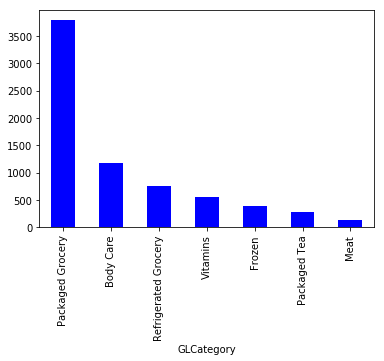

In [70]:
project_data.groupby('GLCategory').size().sort_values(ascending=False).plot(kind='bar', color='blue');

In [71]:
# Create train / test sets,
split_data = get_stratified_train_test_split(project_data)

train_df = split_data[0]
test_df = split_data[1]

In [72]:
train_df.head()

,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays,GLCategory
677,1.018181,0.195270,0.0,4.0,50.620929,10.015416,0.00,203.84,495,218,Frozen
4971,0.993097,0.334028,0.0,8.0,18.981970,6.503373,0.00,156.16,3477,290,Refrigerated Grocery
4762,2.088541,1.485281,1.0,13.0,9.058697,6.424840,3.63,53.76,576,236,Vitamins
3317,1.139293,0.451081,0.0,4.0,22.904033,8.955612,0.00,83.20,481,218,Body Care
4725,0.877192,0.425532,0.0,2.0,65.888421,31.647992,0.00,139.56,57,46,Packaged Grocery


In [83]:
project_data.iloc[677]

UniversalProductCode       4227200373
AvgUnitsShipped               1.01818
StdUnitsShipped               0.19527
MinUnitsShipped                     0
MaxUnitsShipped                     4
AvgNetAmount                  50.6209
StdNetAmount                  10.0154
MinNetAmount                        0
MaxNetAmount                   203.84
NumberOfTransactions              495
NumberOfTransactionDays           218
GLCategory                     Frozen
Name: 677, dtype: object

In [74]:
train_df.isnull().sum()

AvgUnitsShipped             0
StdUnitsShipped            46
MinUnitsShipped             0
MaxUnitsShipped             0
AvgNetAmount                0
StdNetAmount               46
MinNetAmount                0
MaxNetAmount                0
NumberOfTransactions        0
NumberOfTransactionDays     0
GLCategory                  0
dtype: int64

In [75]:
print(len(train_df))

5656


In [60]:
test_df.head()

,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays,GLCategory
2740,1.213592,0.734102,0.0,10.0,33.248834,19.471478,0.0,273.90,2266,268,Frozen
3207,0.887323,0.946053,0.0,8.0,15.366619,19.967595,0.0,164.32,142,98,Packaged Grocery
5198,2.691275,1.267576,0.0,6.0,11.708926,5.507259,0.0,25.86,149,113,Packaged Grocery
2481,3.131826,4.040205,0.0,122.0,27.349972,35.054423,0.0,1057.74,2875,284,Body Care
1024,1.337686,0.908813,0.0,8.0,12.781902,8.643699,0.0,76.00,536,218,Body Care


In [76]:
test_df.isnull().sum()

AvgUnitsShipped             0
StdUnitsShipped            17
MinUnitsShipped             0
MaxUnitsShipped             0
AvgNetAmount                0
StdNetAmount               17
MinNetAmount                0
MaxNetAmount                0
NumberOfTransactions        0
NumberOfTransactionDays     0
GLCategory                  0
dtype: int64

In [77]:
print(len(test_df))

1415


In [78]:
original = project_data.groupby(TARGET_COLUMN).size() / len(project_data)
train = train_df.groupby(TARGET_COLUMN).size() / len(train_df)
test = test_df.groupby(TARGET_COLUMN).size() / len(test_df)

print("Difference in training target proportions")
print("=========================================")
print(original - train)
print("Difference in test target proportions")
print("=====================================")
print(original - test)

Difference in training target proportions
GLCategory
Body Care               0.000047
Frozen                 -0.000078
Meat                   -0.000073
Packaged Grocery       -0.000005
Packaged Tea            0.000030
Refrigerated Grocery    0.000020
Vitamins                0.000059
dtype: float64
Difference in test target proportions
GLCategory
Body Care              -0.000188
Frozen                  0.000314
Meat                    0.000293
Packaged Grocery        0.000020
Packaged Tea           -0.000119
Refrigerated Grocery   -0.000081
Vitamins               -0.000238
dtype: float64


In [82]:
# Save the train / test sets
train_df.reset_index().to_csv('../data/processed/train_2018-08-24.csv', index=False)
test_df.reset_index().to_csv('../data/processed/test_2018-08-24.csv', index=False)